In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

 # Importing Data and EDA

In [18]:
df=pd.read_csv("/kaggle/input/comment_toxicity/train.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [19]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [20]:
# Check class distribution
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
df['toxic_comment'] = df[label_cols].sum(axis=1) > 0  # Create a binary toxic vs non-toxic column

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


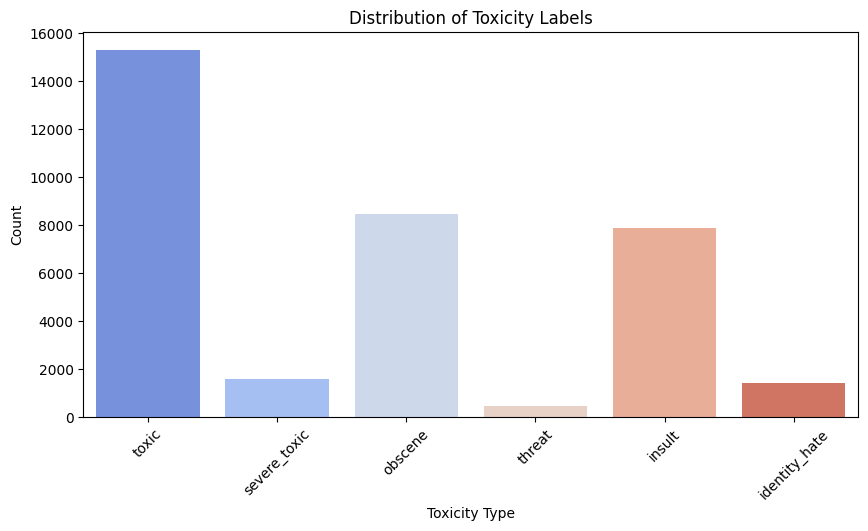

In [21]:
# Plot distribution of toxicity levels
plt.figure(figsize=(10,5))
sns.barplot(x=label_cols, y=df[label_cols].sum(), palette="coolwarm")
plt.title("Distribution of Toxicity Labels")
plt.xlabel("Toxicity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

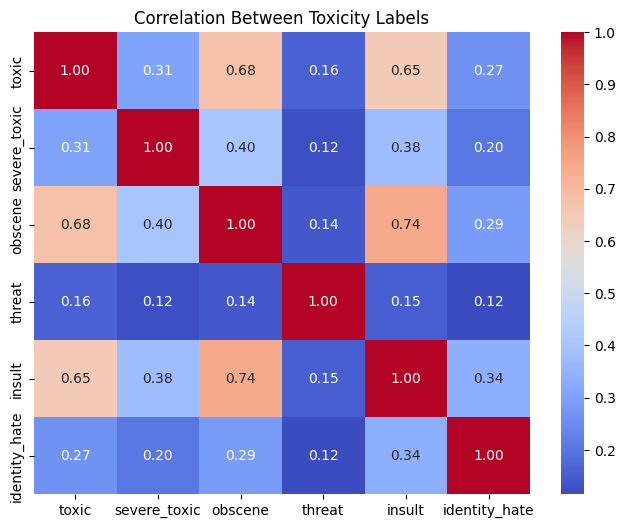

In [22]:
# Check correlation between toxicity categories
plt.figure(figsize=(8,6))
sns.heatmap(df[label_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Toxicity Labels")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


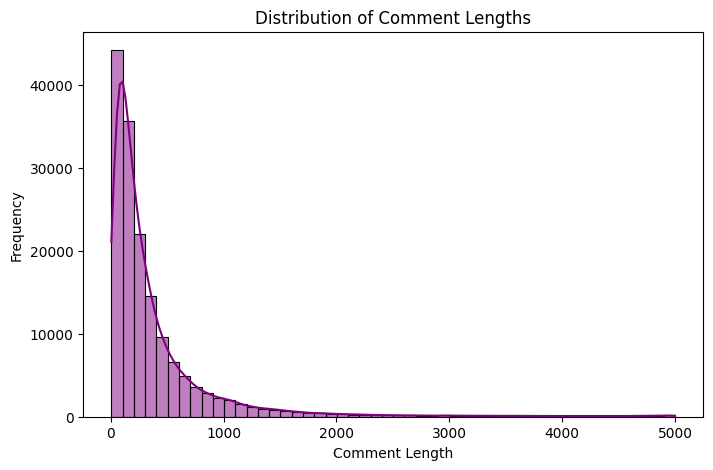

In [23]:
# Text length analysis
df['comment_length'] = df['comment_text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,5))
sns.histplot(df['comment_length'], bins=50, kde=True, color='purple')
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length")
plt.ylabel("Frequency")
plt.show()

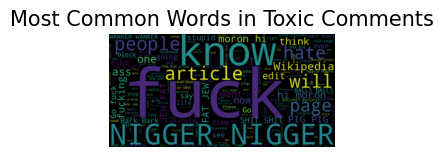

In [24]:
# Word Cloud for toxic vs non-toxic comments
!pip install wordcloud
from wordcloud import WordCloud
toxic_text = " ".join(df[df["toxic_comment"]==1]['comment_text'])
non_toxic_text = " ".join(df[df["toxic_comment"]==0]['comment_text'])

# Word Cloud for Toxic Comments
plt.subplot(1,2,1)
wordcloud_toxic = WordCloud(width=800, height=400, background_color="black").generate(toxic_text)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Toxic Comments", fontsize=15)
plt.show()

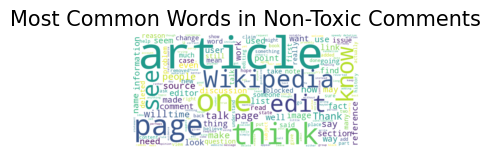

In [25]:
# Word Cloud for Non-Toxic Comments
plt.subplot(1,2,2)
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color="white").generate(non_toxic_text)
plt.imshow(wordcloud_non_toxic, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Non-Toxic Comments", fontsize=15)
plt.show()

# Data Preprocessing 

In [26]:
from tensorflow.keras.layers import TextVectorization

In [27]:
x=df['comment_text']
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = df[label_cols].values  

# Convert y to numpy array with int64 type
y = y.astype(np.int64)

In [28]:
#Numbers of words in the vocabulary
MAX_FEATURES=500000

In [29]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=2500,output_mode='int')

In [30]:
vectorizer.adapt(x.values)

In [31]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [32]:
vectorized_text=vectorizer(x.values)
vectorized_text

<tf.Tensor: shape=(159571, 2500), dtype=int64, numpy=
array([[   645,     76,      2, ...,      0,      0,      0],
       [219427,     54,   2489, ...,      0,      0,      0],
       [   425,    441,     70, ...,      0,      0,      0],
       ...,
       [ 32445,   7392,    383, ...,      0,      0,      0],
       [     5,     12,    534, ...,      0,      0,      0],
       [     5,      8,    130, ...,      0,      0,      0]])>

In [33]:
MAX_SEQUENCE_LENGTH = np.max([len(seq) for seq in vectorized_text])  
# Find max length
print("Max Sequence Length:", MAX_SEQUENCE_LENGTH)

Max Sequence Length: 2500


In [34]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [35]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [36]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [37]:
train_generator=train.as_numpy_iterator()

# Creating Sequential Model

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [39]:
model = Sequential()
model.add(Embedding(input_dim=MAX_FEATURES+1, output_dim=32, input_length=MAX_SEQUENCE_LENGTH))  # Add input_length
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

In [41]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2500, 32)            │      16,000,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,091,686 (61.38 MB)

 Trainable params: 16,091,686 (61.38 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 894s 127ms/step - loss: 0.0875 - val_loss: 0.0461
Epoch 2/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 884s 127ms/step - loss: 0.0470 - val_loss: 0.0410
Epoch 3/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 884s 127ms/step - loss: 0.0404 - val_loss: 0.0436
Epoch 4/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 884s 127ms/step - loss: 0.0359 - val_loss: 0.0309
Epoch 5/5
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 884s 127ms/step - loss: 0.0320 - val_loss: 0.0298


<Figure size 800x500 with 0 Axes>

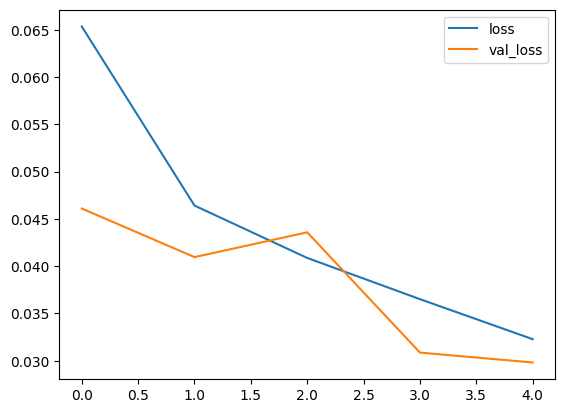

In [44]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Model Evalution

In [45]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    y_pred = model.predict(X_true)
    # Flatten the predictions
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    pre.update_state(y_true, y_pred)
    re.update_state(y_true, y_pred)
    acc.update_state(y_true,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━

In [48]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9230506420135498, Recall:0.7414835095405579, Accuracy:0.48846539855003357


# Gradio Interface

In [49]:
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 29.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [50]:
import gradio as gr

In [51]:
model.save('Comment_Toxicity.h5')

In [62]:
print(model.output_shape)

(None, 6)


In [53]:
model=tf.keras.models.load_model('/kaggle/working/Comment_Toxicity.h5')

In [63]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    # Limit the loop to the actual number of model outputs
    num_outputs = results.shape[1]  # Get number of predictions
    for idx, col in zip(range(num_outputs), df.columns[2:2+num_outputs]):  
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
    
    return text

In [64]:
interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder="Comment to score"),
    outputs="text"
)

In [65]:
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://099e6a2f28018b0aea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
